In [113]:
import os
import os.path
import pathlib
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import math
import scipy.signal
import pandas as pd

In [47]:
paths = r'/Users/chengziming/Desktop/humanCountData/pics'

In [48]:
def get_file(file_path, pattern="*"):
    """
    函数 获取给定目录下的所有文件的绝对路径
    参数 file_path: 文件目录
    参数 pattern:默认返回所有文件，也可以自定义返回文件类型，例如：pattern="*.py"
    返回值 abspath:文件路径列表
    """
    all_file = []
    files = pathlib.Path(file_path).rglob(pattern)
    for file in files:
        if pathlib.Path.is_file(file):
            all_file.append(file)
    return all_file

In [49]:
res = get_file(paths, pattern='*.jpg')
#for i in res:
#    print(i)
print(len(res))

7614


In [51]:
s = str(res[1])
print(s)

/Users/chengziming/Desktop/humanCountData/pics/13628.jpg


In [41]:
imageA = io.imread('./pics-1/10000.jpg')
imageB = io.imread('./pics-1/17609.jpg')
s = ssim(imageA, imageB, multichannel=True)
print(s)

0.6612147976194662


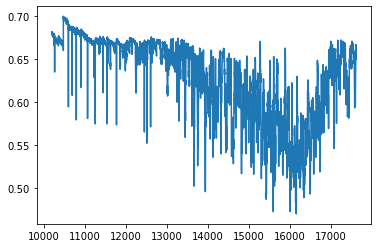

In [77]:
imageOri = io.imread('./pics-1/10000.jpg')
x = []
y = []
for i in range(10200,17614):
    x.append(i)
    path = "/Users/chengziming/Desktop/humanCountData/pics/" + str(i) + ".jpg"
    imageOri = io.imread('./pics-1/10000.jpg')
    img = io.imread(path)
    s = ssim(imageOri, img, multichannel=True)
    y.append(s)
    #print(path + ":")
    #print(s)
plt.plot(x,y)
plt.show()

In [78]:
logy = []
for i in y:
    logy.append((-0.4)-math.log(i))

[]

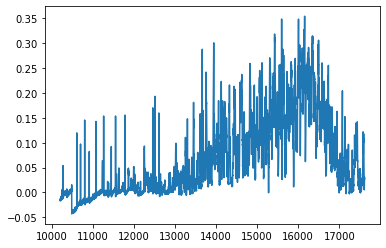

In [84]:
plt.plot(x,logy)
plt.plot()

In [158]:
Savitzky_Golay_smooth = scipy.signal.savgol_filter(logy,2001,3)

[]

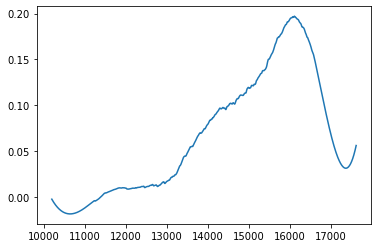

In [159]:
plt.plot(x,Savitzky_Golay_smooth)
plt.plot()

In [147]:
time_index = pd.date_range(start='6:00', end = '8:00', periods=7414)
time_index = time_index.values
print(time_index)

['2021-09-15T06:00:00.000000000' '2021-09-15T06:00:00.971266693'
 '2021-09-15T06:00:01.942533387' ... '2021-09-15T07:59:58.057466612'
 '2021-09-15T07:59:59.028733306' '2021-09-15T08:00:00.000000000']


In [149]:
time = []
for i in range(0,len(time_index)):
    #print(type(time_index[i]))
    time.append(str(time_index[i])[12:16])
print(time)

['6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:00', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:01', '6:02',

[]

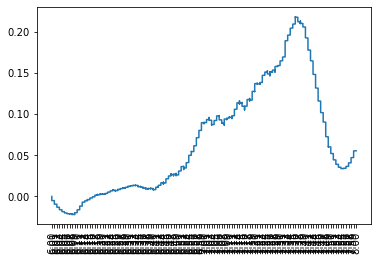

In [152]:
plt.plot(time,Savitzky_Golay_smooth)
plt.xticks(rotation=0) #45为旋转的角度
plt.plot()